In [107]:
import pandas as pd
import numpy as np


In [108]:
arr_1 = np.array([1, 2, 3, 4, 5])
arr_2 = np.array([[1,2,3], [2,3,4], [3,4,5]])
print(arr_2.ndim)
print(type(arr_2))

2
<class 'numpy.ndarray'>


In [109]:
## https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database
BASE_PATH = '../dataset/'
## dataframe object, which is a two-dimensional table with rows and columns
anime_df = pd.read_csv(f'{BASE_PATH}/merged_anime.csv', index_col='anime_id')   ## anime_id,name,genre,type,episodes,rating,members
rating_df = pd.read_csv(f'{BASE_PATH}/rating.csv')   ## user_id,anime_id,rating
parsed_anime_df = pd.read_csv(f'{BASE_PATH}/merged_anime.csv', index_col='anime_id')

print(anime_df.size)
print(rating_df.size)
print(parsed_anime_df.size)   

sorted_df = anime_df.sort_values(by=['rating'], ascending=False)      ## 自带的rating, 但我们马上要自己算
print(type(sorted_df))    ## DataFrame
# print(sorted_df.iloc[:5])     ## first 5 rows

print(sorted_df.iloc[:3].index.to_list())    ## indexes to list
print(sorted_df.iloc[:3]['name'].to_list())    ## anime_id list based on column

print(type(sorted_df.iloc[:3][['name', 'genre']].values))  ## anime_id list based on column，converts the selected dataframe to a numpy array.
print(sorted_df.iloc[:3][['name', 'genre']].values.tolist())  ## converts the selected data to a numpy array => list


110646
23441211
110646
<class 'pandas.core.frame.DataFrame'>
[33662, 30120, 23005]
['Taka no Tsume 8: Yoshida-kun no X-Files', 'Spoon-hime no Swing Kitchen', 'Mogura no Motoro']
<class 'numpy.ndarray'>
[['Taka no Tsume 8: Yoshida-kun no X-Files', 'Comedy, Parody'], ['Spoon-hime no Swing Kitchen', 'Adventure, Kids'], ['Mogura no Motoro', 'Slice of Life']]


In [110]:
# 1. 数据格式
anime_df.dtypes
# rating_df.dtypes

name               object
genre              object
type               object
episodes           object
rating            float64
members             int64
japanese_title     object
aired              object
image_url          object
dtype: object

In [61]:
# 2. 数据规模
# uniq_anime_count = rating_df['anime_id'].nunique()
# uniq_anime_count   ## how many anime

genre_count = anime_df['genre'].nunique()
genre_count

3264

In [62]:
uniq_user_count = rating_df['user_id'].nunique()
uniq_user_count  ## how many users

73515

In [63]:
rating_df.shape

(7813737, 3)

In [64]:
# 3. 数据分布

In [65]:
uniq_ratings = rating_df['rating'].nunique()
uniq_ratings   # 0,1,2---10

11

<Axes: ylabel='Frequency'>

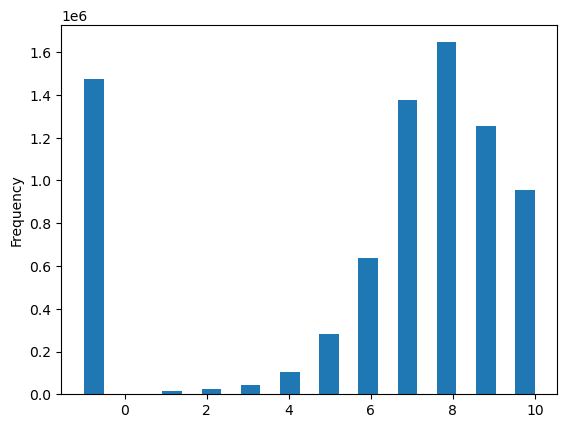

In [66]:
rating_df['rating'].plot.hist(bins=2*uniq_ratings+1)

In [72]:
rating_df.query('rating > 0')['rating'].describe()  ## This filters the DataFrame to include only rows where the 'rating' is greater than 3
# anime_df.query('rating > 3')['rating'].describe()

count    6.255989e+06
mean     7.879972e+00
std      1.448561e+00
min      4.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

In [98]:
valid_rating_df = rating_df[rating_df['rating'] > 0]   ## 6255989
print(type(valid_rating_df))
print(type(rating_df.query('rating > 0')))   ## dataframe two methods to filter

valid_rating_df.shape[0]

# rating_df.query('rating > 3')['rating'].shape[0]


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


6337241

<Axes: ylabel='Frequency'>

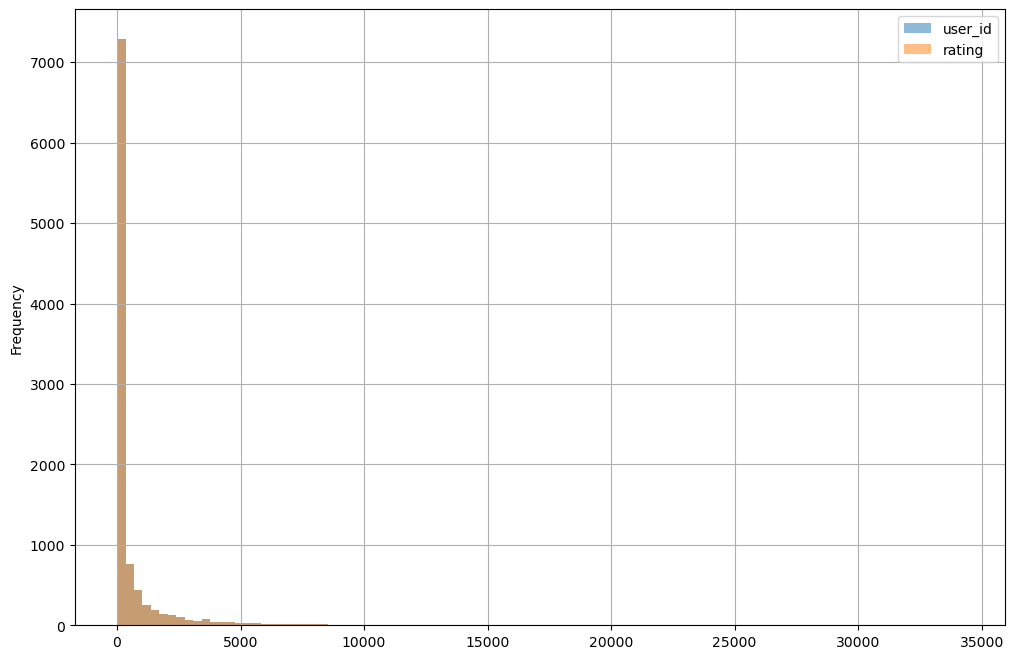

In [99]:
### 3.1 每部动漫的评分数
rating_groupby_anime = valid_rating_df.groupby(['anime_id']).count()
rating_groupby_anime.plot.hist(bins=100, grid=True, figsize=[12, 8], alpha=0.5)

In [100]:
rating_groupby_anime.describe()   ## 每个anime的rating数量

,user_id,rating
count,9927.000000,9927.000000
mean,638.384305,638.384305
std,1795.865541,1795.865541
min,1.000000,1.000000
25%,9.000000,9.000000
50%,57.000000,57.000000
75%,395.000000,395.000000
max,34226.000000,34226.000000


<Axes: ylabel='Frequency'>

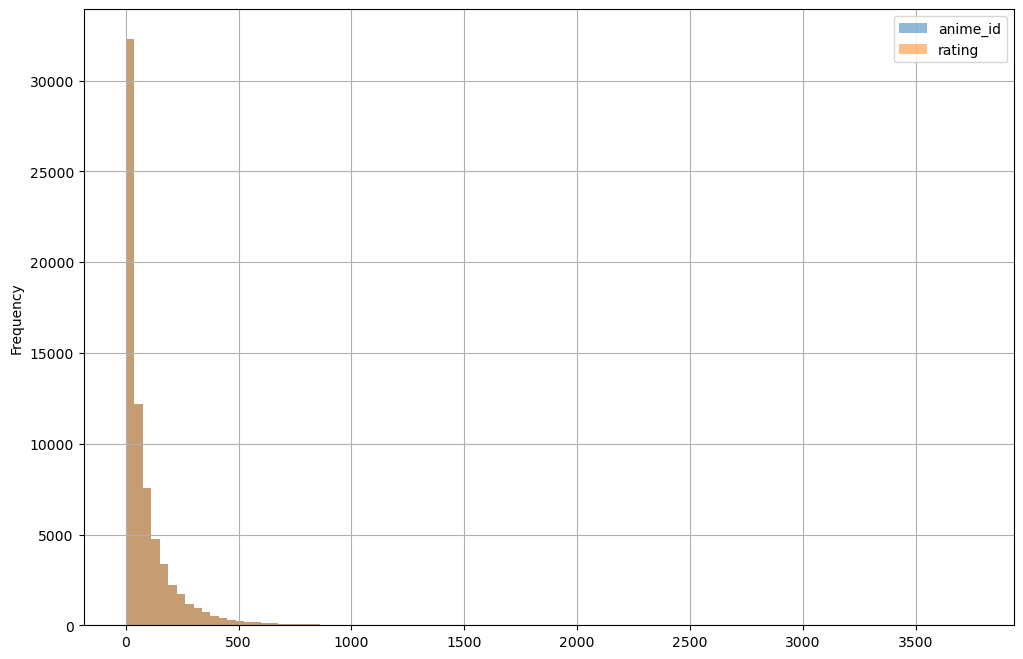

In [101]:
### 3.2 每个用户的评分
rating_groupby_user = valid_rating_df.groupby(['user_id']).count()    ## 每个user rating的数量
rating_groupby_user.plot.hist(bins=100, grid=True, figsize=[12, 8], alpha=0.5)

In [102]:
rating_groupby_user.describe()

,anime_id,rating
count,69600.000000,69600.000000
mean,91.052313,91.052313
std,135.764253,135.764253
min,1.000000,1.000000
25%,13.000000,13.000000
50%,45.000000,45.000000
75%,114.000000,114.000000
max,3747.000000,3747.000000


In [103]:
genres = {}   ## dictionary
### 3.3 动漫类型分布 => dict
for (index, row) in anime_df.iterrows():
    try:
        anime_genres = [g.strip() for g in row['genre'].split(',')]
        for genre in anime_genres:
            if genre not in genres:
                genres[genre] = 0
            genres[genre] += 1
    except:
        pass
    
print(genres)

{'Drama': 2016, 'Romance': 1464, 'School': 1220, 'Supernatural': 1037, 'Action': 2845, 'Adventure': 2348, 'Fantasy': 2309, 'Magic': 778, 'Military': 426, 'Shounen': 1712, 'Comedy': 4645, 'Historical': 806, 'Parody': 408, 'Samurai': 148, 'Sci-Fi': 2070, 'Thriller': 87, 'Sports': 543, 'Super Power': 465, 'Space': 381, 'Slice of Life': 1220, 'Mecha': 944, 'Music': 860, 'Mystery': 495, 'Seinen': 547, 'Martial Arts': 265, 'Vampire': 102, 'Shoujo': 603, 'Horror': 369, 'Police': 197, 'Psychological': 229, 'Demons': 294, 'Ecchi': 637, 'Josei': 54, 'Shounen Ai': 65, 'Game': 181, 'Dementia': 240, 'Harem': 317, 'Cars': 72, 'Kids': 1609, 'Shoujo Ai': 55, 'Hentai': 1141, 'Yaoi': 39, 'Yuri': 42}


<class 'dict_items'>


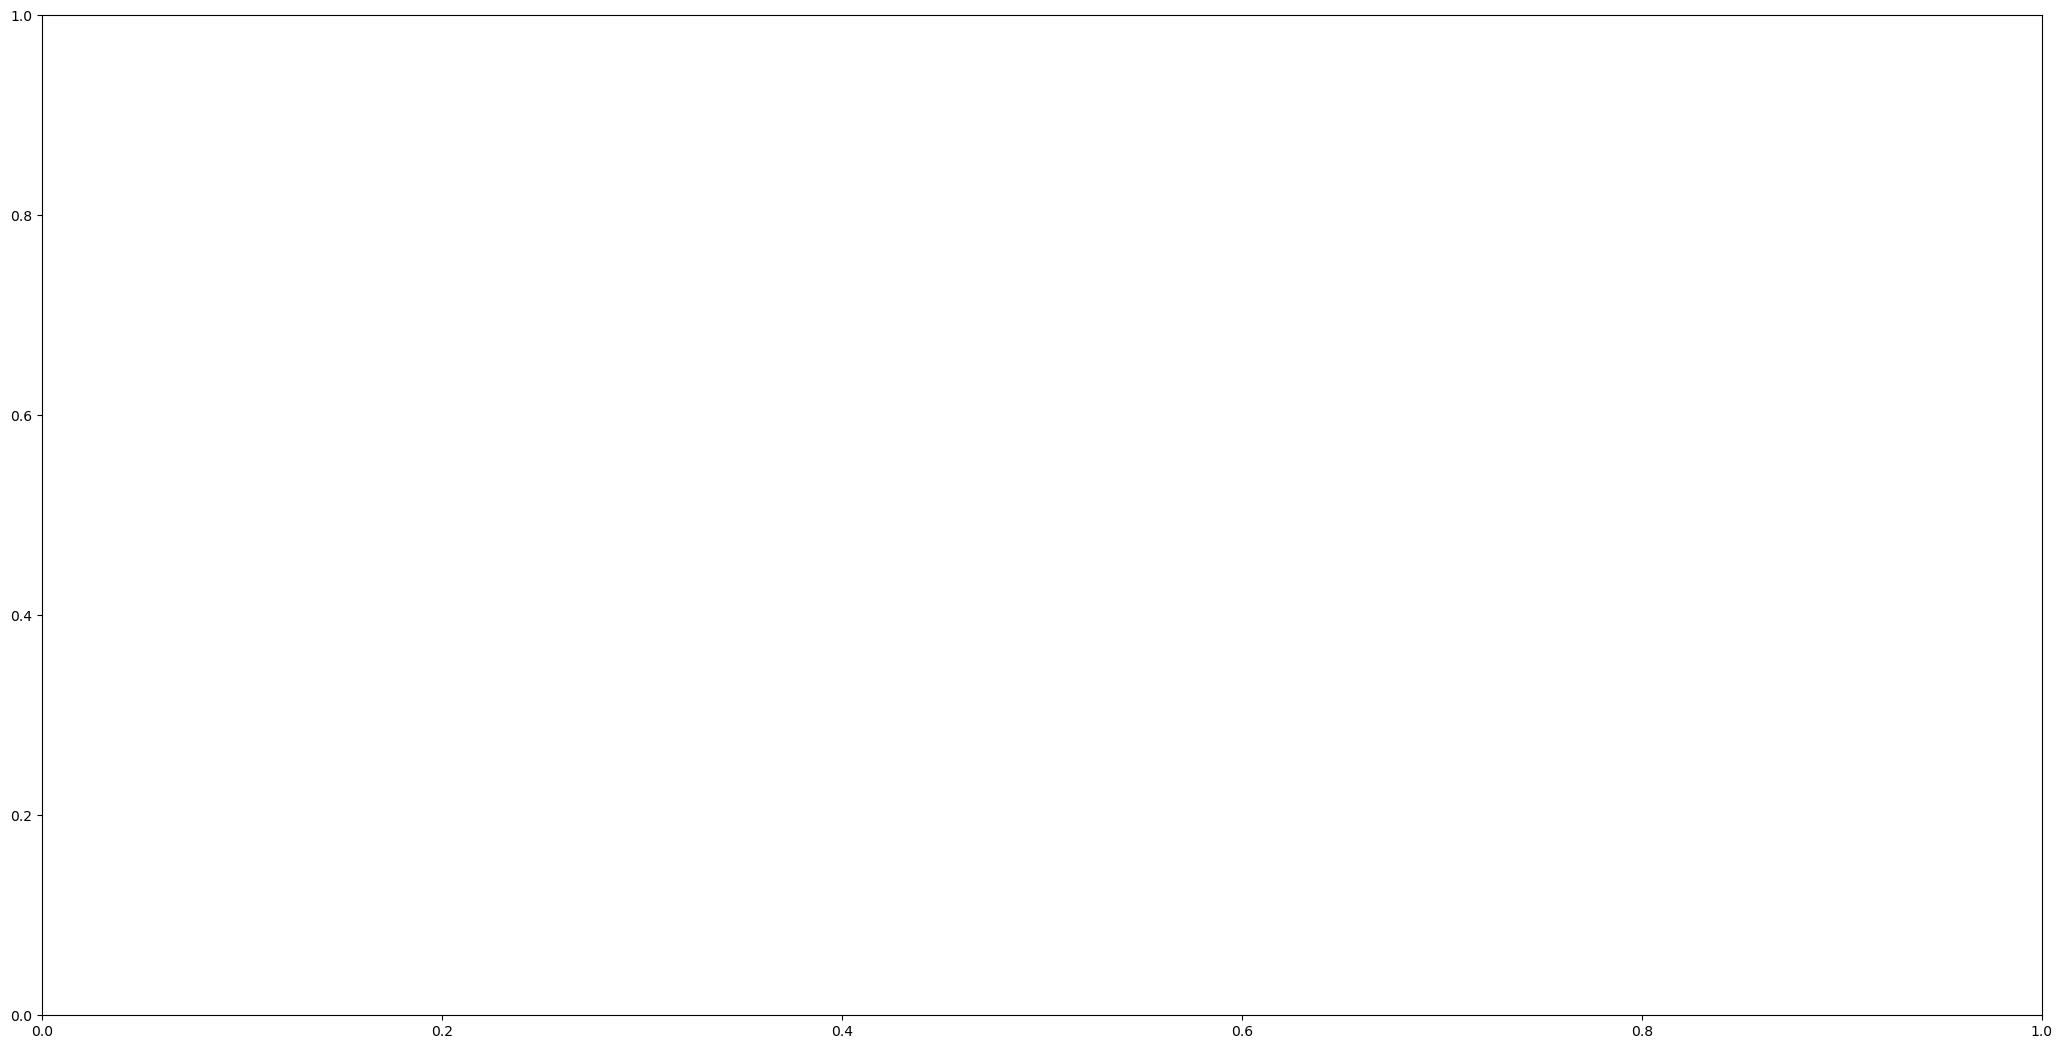

In [104]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0, 0, 1, 1])
tuples = sorted(genres.items(), key=lambda x: x[1])
print(type(genres.items()))    ## dict_items

labels = [t[0] for t in tuples]
values = [t[1] for t in tuples]
ax.bar(labels, values)
plt.xticks(rotation=70, fontsize=15)
plt.show()

In [127]:
# 4. 评分前几名的动漫
groupby_df = valid_rating_df.groupby(['anime_id']).agg({
        'rating': ['count', 'mean']
    }).droplevel(axis=1, level=0)
groupby_df                             

,count,mean
anime_id,,
1,13449,8.869433
5,5790,8.439724
6,9385,8.419393
7,2169,7.533426
8,308,7.198052
...,...,...
34324,11,5.909091
34325,15,7.333333
34349,3,7.000000


<Axes: xlabel='count', ylabel='mean'>

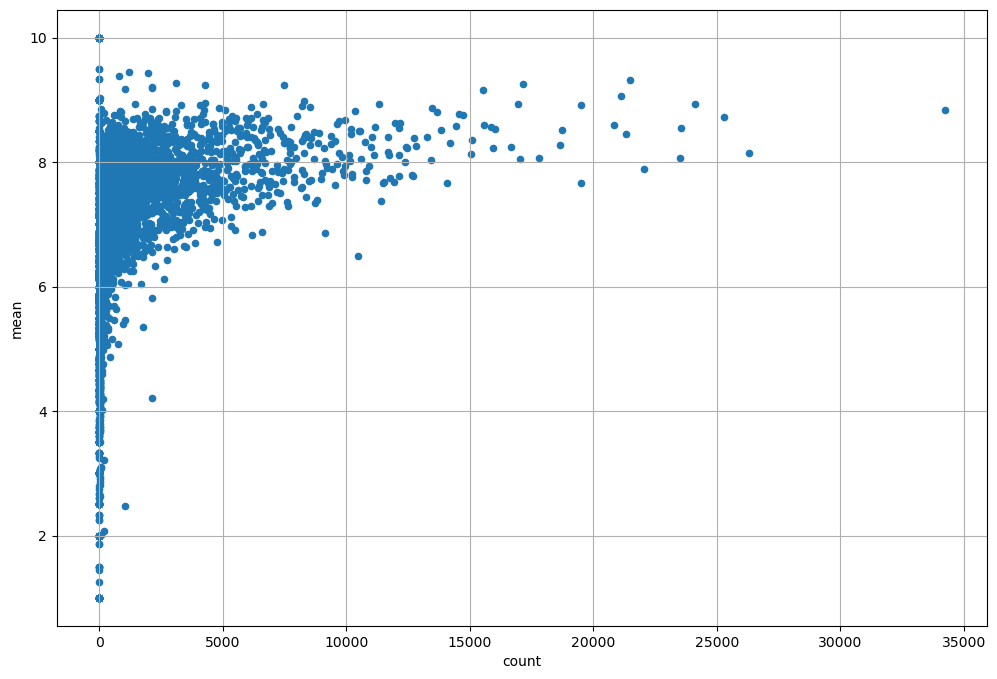

In [123]:
# 5. 评分数量和评分高低的关系
groupby_df.plot.scatter(x='count', y='mean', grid=True, figsize=[12, 8])